## DS540

## Final Project

## Venkat Radhakrishnan

## Data Sources

**Flat File** : The COVID-19 cases and deaths data are available in CSV format. This dataset contains information about the number of confirmed cases and deaths due to COVID-19 in each country. The Center for Systems Science and Engineering (CSSE) at Johns Hopkins University collects the data

Link: https://github.com/CSSEGISandData/COVID19/tree/master/csse_covid_19_data/csse_covid_19_time_series

**Website Data** : https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)

**GDP data**

Link : https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?format=json&per_page=20000&p

The cleansed data from the previous milestones of the above mentioned data sources will be loaded into data bases and 5 Visualizations will be performed

## Assumptions

1. Data Reliability: It is assumed that the COVID-19 cases and deaths data obtained from the CSSE at Johns Hopkins University is reliable and regularly updated. However, it's important to note that data accuracy may vary due to factors such as reporting inconsistencies, variations in testing and recording practices, and delays in data collection and dissemination. For example, the impact of COVID is more in China as per the internet it is severe, but the data source has very minimal representation of data for China.

2. Consistency of Data Format: The assumption is that the COVID-19 cases and deaths data in CSV format from the provided GitHub link follows a consistent structure, with standardized columns representing country/region, date, and the number of confirmed cases and deaths. The data is expected to be organized in a tabular format suitable for analysis.

3. Population Data Source: The assumption is that the population data for each country will be sourced from the provided Wikipedia link. It is assumed that this source provides reliable and up-to-date information on country populations as reported by the United Nations. Though the population columns are marked for 2022 and 2023 since taken as on January 1st, it will be labelled as 2021 and 2022 for our analysis.

4. GDP Data Source: The assumption is that the GDP data will be obtained from the provided World Bank API link. It is expected that the API provides accurate and comprehensive GDP data for various countries. However, it's important to note that the reliability and consistency of GDP data can vary across countries, and the API response should be properly handled for missing or incomplete data.



**Loading the necessary Libraries**

In [1]:
import sqlite3
import pandas as pd

**Creating the Db and loading the CSV files from previous milestones**

In [25]:
# Create a connection to the SQLite database
conn = sqlite3.connect('covid_impact.db')

# Load the CSV files into pandas dataframes
covid_cases_df_2020 = pd.read_csv('covid_cases_2020.csv')
covid_cases_df_2021 = pd.read_csv('covid_cases_2021.csv')
covid_cases_df_2022 = pd.read_csv('covid_cases_2022.csv')
population_df = pd.read_csv('population.csv')
gdp_df_2020 = pd.read_csv('gdp_2020.csv')
gdp_df_2021 = pd.read_csv('gdp_2021.csv')

# Write the dataframes to the SQLite database as tables

## CSV from previous milestones, covid cases, population, GDP data.
covid_cases_df_2020.to_sql('covid_cases', conn, if_exists='replace', index=False)
covid_cases_df_2021.to_sql('covid_cases', conn, if_exists='append', index=False)
covid_cases_df_2022.to_sql('covid_cases', conn, if_exists='append', index=False)
population_df.to_sql('population', conn, if_exists='replace', index=False)
gdp_df_2020.to_sql('gdp', conn, if_exists='replace', index=False)
gdp_df_2021.to_sql('gdp', conn, if_exists='append', index=False)

# Close the database connection
conn.close()

C:\Users\krish\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [27]:
# Connect to the SQLite database
conn = sqlite3.connect('covid_impact.db')

# Create a cursor object
cursor = conn.cursor()

# Execute the SQL UPDATE statement to change the country cell from "US" to "United States"
update_query = "UPDATE covid_cases SET [Country/Region] = 'United States' WHERE [Country/Region] = 'US'"
cursor.execute(update_query)

# Commit the changes to the database
conn.commit()

# Close the cursor and the database connection
cursor.close()
conn.close()


**Querying and Verifying the data**

In [28]:
# Create a connection to the SQLite database
conn = sqlite3.connect('covid_impact.db')

# Query the tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

# Iterate over the tables and retrieve the data
for table in tables['name']:
    # Query the data from each table
    query = f"SELECT * FROM {table};"
    data = pd.read_sql(query, conn)
    
    # Print the table name and data
    print(f"Table: {table}")
    print(data)
    print("\n")

# Close the database connection
conn.close()





Table: covid_cases
           Country/Region  Confirmed  Deaths  Year
0             Afghanistan      52330    2189  2020
1                 Albania      58316    1181  2020
2                 Algeria      99610    2756  2020
3                 Andorra       8049      84  2020
4                  Angola      17553     405  2020
..                    ...        ...     ...   ...
586    West Bank and Gaza     233480     789  2022
587  Winter Olympics 2022        535       0  2022
588                 Yemen       1819     175  2022
589                Zambia      80151     290  2022
590              Zimbabwe      46723     633  2022

[591 rows x 4 columns]


Table: population
                               Country    Region           Subregion  \
0                                india      Asia       Southern Asia   
1                                china      Asia        Eastern Asia   
2                        united states  Americas    Northern America   
3                            indonesi

## Visualization 1


Uses 2 tables, **gdp** and **covid_cases** tables to provide the Covid impact on Top 10 Countries with high GDP for the years 2020, 2021 and 2022

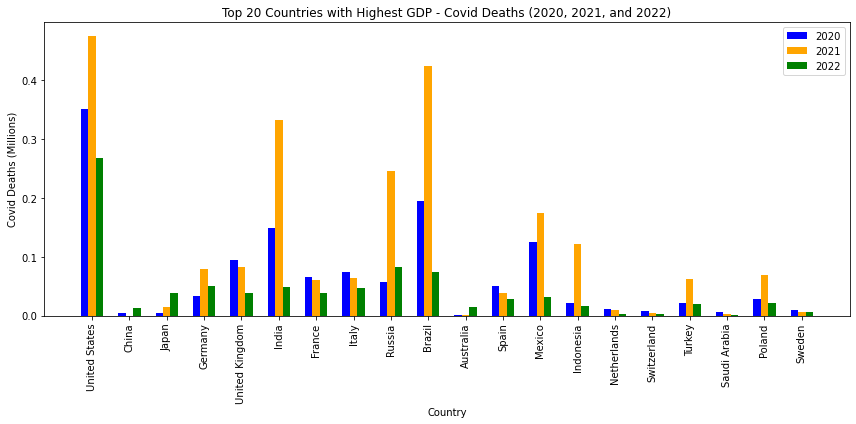

In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('covid_impact.db')

# Read the data from the "covid_cases" table for the year 2020
covid_cases_query_2020 = "SELECT Year, [Country/Region] AS Country, Confirmed, Deaths FROM covid_cases WHERE Year = '2020'"
covid_cases_2020 = pd.read_sql_query(covid_cases_query_2020, conn)

# Read the data from the "covid_cases" table for the year 2021
covid_cases_query_2021 = "SELECT Year, [Country/Region] AS Country, Confirmed, Deaths FROM covid_cases WHERE Year = '2021'"
covid_cases_2021 = pd.read_sql_query(covid_cases_query_2021, conn)

# Read the data from the "gdp" table for the year 2020
gdp_query_2020 = "SELECT * FROM gdp WHERE Year = '2020'"
gdp_2020 = pd.read_sql_query(gdp_query_2020, conn)

# Merge the covid_cases_2020 and gdp_2020 dataframes based on Country
merged_data_2020 = pd.merge(covid_cases_2020, gdp_2020, on="Country", how="inner")

# Sort the data based on GDP in descending order and select the top 20 countries
top_20_gdp_countries = merged_data_2020.nlargest(20, "GDP millions USD")["Country"]

# Filter the merged_data_2020 for the top 20 countries
top_20_data_2020 = merged_data_2020[merged_data_2020["Country"].isin(top_20_gdp_countries)]

# Merge the covid_cases_2021 and gdp_2020 dataframes based on Country
merged_data_2021 = pd.merge(covid_cases_2021, gdp_2020, on="Country", how="inner")

# Filter the merged_data_2021 for the top 20 countries
top_20_data_2021 = merged_data_2021[merged_data_2021["Country"].isin(top_20_gdp_countries)]

# Read the data from the "covid_cases" table for the year 2022
covid_cases_query_2022 = "SELECT Year, [Country/Region] AS Country, Confirmed, Deaths FROM covid_cases WHERE Year = '2022'"
covid_cases_2022 = pd.read_sql_query(covid_cases_query_2022, conn)

# Merge the covid_cases_2022 and gdp_2020 dataframes based on Country
merged_data_2022 = pd.merge(covid_cases_2022, gdp_2020, on="Country", how="inner")

# Filter the merged_data_2022 for the top 20 countries
top_20_data_2022 = merged_data_2022[merged_data_2022["Country"].isin(top_20_gdp_countries)]

# Sort the data by GDP in descending order
top_20_data_2020 = top_20_data_2020.sort_values(by="GDP millions USD", ascending=False)
top_20_data_2021 = top_20_data_2021.sort_values(by="GDP millions USD", ascending=False)
top_20_data_2022 = top_20_data_2022.sort_values(by="GDP millions USD", ascending=False)

# Print the dataframe showing the chart data
#print("2020,2021, 2022 Covid Deaths for Top 20 GDP Countries:")
#print(top_20_data_2020)
#print(top_20_data_2021)
#print(top_20_data_2022)

# Create a bar chart for Covid Deaths (2020, 2021, and 2022)
plt.figure(figsize=(12, 6))

# Calculate the positions for the bars
bar_width = 0.2
r1 = np.arange(len(top_20_data_2020))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

# Create the bars for 2020
plt.bar(r1, top_20_data_2020["Deaths"] / 1000000, color='blue', width=bar_width, label='2020')

# Create the bars for 2021
plt.bar(r2, top_20_data_2021["Deaths"] / 1000000, color='orange', width=bar_width, label='2021')

# Create the bars for 2022
plt.bar(r3, top_20_data_2022["Deaths"] / 1000000, color='green', width=bar_width, label='2022')

# Set the x-axis labels
plt.xlabel('Country')
plt.xticks([r + bar_width for r in range(len(top_20_data_2020))], top_20_data_2020['Country'], rotation=90)

# Set the y-axis label
plt.ylabel('Covid Deaths (Millions)')

# Set the chart title
plt.title('Top 20 Countries with Highest GDP - Covid Deaths (2020, 2021, and 2022)')

# Add a legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


Based on the provided data on COVID deaths for the top 10 GDP countries (as on year 2020) between 2020, 2021, and 2022, here is a summary of the trends and impact on the countries:

**United States**: The United States experienced a significant increase in COVID deaths, with a rise from 350,604 deaths in 2020 to 474,864 deaths in 2021. In 2022, the number of deaths decreased to 267,296.

**China**: China reported relatively low COVID deaths throughout the period, with 4,754 deaths in 2020, 66 deaths in 2021, and 12,252 deaths in 2022. China's effective measures to contain the virus resulted in low mortality rates. *There is an inconsistency in the data provided and data available on the internet*

**Japan**: Japan observed a moderate increase in COVID deaths, reaching 34,492 deaths in 2022, compared to 3,492 deaths in 2020. The country faced challenges in managing the pandemic's impact on its population.

**Germany**: Germany saw a rise in COVID deaths from 33,071 in 2020 to 78,531 in 2021. However, the number of deaths decreased to 49,863 in 2022, indicating some improvement in managing the pandemic.

**United Kingdom**: The United Kingdom experienced a significant increase in COVID deaths, reaching 95,107 deaths in 2020. In 2021, the number decreased to 82,762, and further declined to 39,185 in 2022.

**India**: India faced a severe wave of the pandemic, leading to a significant increase in COVID deaths. The country reported 148,994 deaths in 2020, 332,492 deaths in 2021, and 49,219 deaths in 2022.

**France**: France reported 64,758 COVID deaths in 2020, which increased to 59,971 in 2021. The number of deaths slightly decreased to 38,274 in 2022.

**Italy**: Italy experienced a high number of COVID deaths in 2020, with 74,159 fatalities. The number decreased to 63,243 deaths in 2021 and further declined to 47,240 deaths in 2022.

**Russia**: Russia reported 56,271 COVID deaths in 2020, which increased to 246,400 deaths in 2021. In 2022, the number decreased to 83,118 deaths.

**Brazil**: Brazil faced a significant number of COVID deaths throughout the period, with 195,072 deaths in 2020, 424,262 deaths in 2021, and 74,519 deaths in 2022.

These points reflect the varying impact of COVID-19 on the top 10 GDP countries in terms of the number of deaths. It's important to note that these figures are subject to reporting variations and might not capture the complete impact or differences in testing and reporting methodologies among countries.

## Visualization 2

Using **gdp** table, Visualization showing the change in GDP of Top 20 Countries with highest GDP for 2020 and 2021

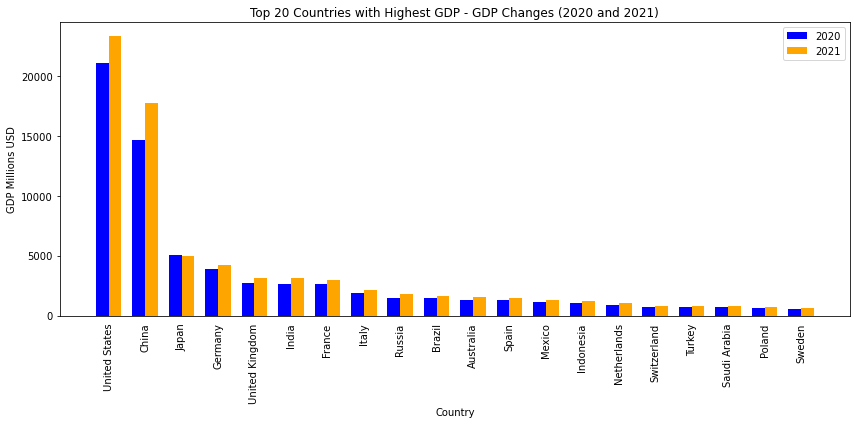

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('covid_impact.db')

# Read the data from the "covid_cases" table for the year 2020
covid_cases_query_2020 = "SELECT Year, [Country/Region] AS Country, Confirmed, Deaths FROM covid_cases WHERE Year = '2020'"
covid_cases_2020 = pd.read_sql_query(covid_cases_query_2020, conn)

# Read the data from the "covid_cases" table for the year 2021
covid_cases_query_2021 = "SELECT Year, [Country/Region] AS Country, Confirmed, Deaths FROM covid_cases WHERE Year = '2021'"
covid_cases_2021 = pd.read_sql_query(covid_cases_query_2021, conn)

# Read the data from the "gdp" table for the year 2020
gdp_query_2020 = "SELECT * FROM gdp WHERE Year = '2020'"
gdp_2020 = pd.read_sql_query(gdp_query_2020, conn)

# Read the data from the "gdp" table for the year 2021
gdp_query_2021 = "SELECT * FROM gdp WHERE Year = '2021'"
gdp_2021 = pd.read_sql_query(gdp_query_2021, conn)

# Merge the covid_cases_2020 and gdp_2020 dataframes based on Country
merged_data_2020 = pd.merge(covid_cases_2020, gdp_2020, on="Country", how="inner")

# Sort the data based on GDP in descending order and select the top 20 countries
top_20_gdp_countries = merged_data_2020.nlargest(20, "GDP millions USD")["Country"]

# Filter the merged_data_2020 for the top 20 countries
top_20_data_2020 = merged_data_2020[merged_data_2020["Country"].isin(top_20_gdp_countries)]

# Merge the covid_cases_2021 and gdp_2021 dataframes based on Country
merged_data_2021 = pd.merge(covid_cases_2021, gdp_2021, on="Country", how="inner")

# Filter the merged_data_2021 for the top 20 countries
top_20_data_2021 = merged_data_2021[merged_data_2021["Country"].isin(top_20_gdp_countries)]

# Sort the data by GDP in descending order
top_20_data_2020 = top_20_data_2020.sort_values(by="GDP millions USD", ascending=False)
top_20_data_2021 = top_20_data_2021.sort_values(by="GDP millions USD", ascending=False)

# Print the dataframe showing the chart data
#print("2020 and 2021 GDP Changes for Top 20 Countries:")
#print(top_20_data_2020[["Country", "GDP millions USD"]])
#print(top_20_data_2021[["Country", "GDP millions USD"]])


# Create a bar chart for GDP changes (2020 and 2021) for each country
plt.figure(figsize=(12, 6))

# Calculate the positions for the bars
bar_width = 0.35
r = np.arange(len(top_20_data_2020))

# Create the bars for 2020
plt.bar(r, top_20_data_2020["GDP millions USD"] / 1000, color='blue', width=bar_width, label='2020')

# Create the bars for 2021
plt.bar(r + bar_width, top_20_data_2021["GDP millions USD"] / 1000, color='orange', width=bar_width, label='2021')

# Set the x-axis labels
plt.xlabel('Country')
plt.xticks(r + bar_width / 2, top_20_data_2020['Country'], rotation=90)

# Set the y-axis label
plt.ylabel('GDP Millions USD')

# Set the chart title
plt.title('Top 20 Countries with Highest GDP - GDP Changes (2020 and 2021)')

# Remove the labels on the bars
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Add a legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


Based on the provided data on GDP changes for the top 20 countries between 2020 and 2021, here are the points regarding the growth of GDP and its impact on the countries:

**United States**: The United States experienced a significant increase in GDP, with a growth of approximately 10.6% from 2020 to 2021, indicating a strong recovery from the pandemic's impact.

**China**: China also demonstrated robust growth in GDP, with an increase of around 20.9% between 2020 and 2021, reflecting its effective containment measures and successful economic rebound.

**Japan**: Japan witnessed a moderate growth in GDP, with an increase of approximately 2.1% from 2020 to 2021, suggesting a gradual recovery but with relatively slower progress compared to some other countries.

**Germany**: Germany exhibited a positive growth in GDP, with an increase of about 9.7% between 2020 and 2021, indicating a substantial recovery from the pandemic-induced economic contraction.

**United Kingdom**: The United Kingdom experienced a notable increase in GDP, with a growth of approximately 15.6% from 2020 to 2021, signifying a strong rebound after the economic downturn caused by the pandemic.

**India**: India demonstrated a moderate growth in GDP, with an increase of around 18.8% between 2020 and 2021, indicating a recovery from the contraction observed in the previous year.

**France**: France witnessed a positive growth in GDP, with an increase of about 12.1% from 2020 to 2021, suggesting a significant recovery and resurgence of economic activity.

**Italy**: Italy experienced a substantial increase in GDP, with a growth of approximately 11.2% between 2020 and 2021, indicating a notable recovery from the economic impact of the pandemic.

**Russia**: Russia demonstrated positive growth in GDP, with an increase of around 19.5% from 2020 to 2021, reflecting a strong rebound in economic activity and recovery from the pandemic-induced downturn.

**Brazil**: Brazil experienced moderate growth in GDP, with an increase of approximately 11.1% between 2020 and 2021, indicating a recovery from the economic challenges faced in the previous year.

These points highlight the varying degrees of GDP growth among the top 20 countries, indicating the different rates of recovery and resilience in the face of the COVID-19 pandemic. It is important to note that these GDP changes represent a snapshot of the economic situation during the specified period and do not capture the entirety of the economic impact or long-term trends. Also, careful analysis of the Pre-Pandemic years need to be done to gauge the economic impact due to pandemic

## Visualization 3

Using **population** table, showing the Distribution of population based on regions for years 2021 and 2022

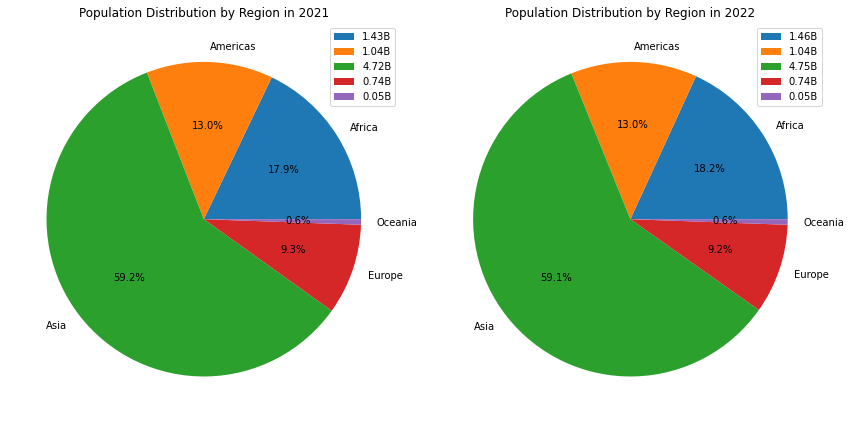

In [34]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('covid_impact.db')
cursor = conn.cursor()

# Execute the SQL queries and fetch the data for 2022
cursor.execute("SELECT Region, SUM(`Population (2022)`) FROM population WHERE Country != 'world' GROUP BY Region")
population_2022_data = cursor.fetchall()

# Separate the region names and population values for 2022
regions_2022 = [row[0] for row in population_2022_data]
population_2022 = [row[1] for row in population_2022_data]

# Execute the SQL queries and fetch the data for 2023
cursor.execute("SELECT Region, SUM(`Population (2023)`) FROM population WHERE Country != 'world' GROUP BY Region")
population_2023_data = cursor.fetchall()

# Separate the region names and population values for 2023
regions_2023 = [row[0] for row in population_2023_data]
population_2023 = [row[1] for row in population_2023_data]


#print("Regionwise population data for 2021")
#print(regions_2022)
#print(population_2022)

#print("Regionwise population data for 2022")
#print(regions_2023)
#print(population_2023)

# Close the cursor and the database connection
cursor.close()
conn.close()

# Create subplots for side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the pie chart for 2022
ax1.pie(population_2022, labels=regions_2022, autopct='%1.1f%%')

# Add population numbers as labels for each region in 2022
pop_labels_2022 = [f'{pop / 1e9:.2f}B' for pop in population_2022]
ax1.legend(labels=pop_labels_2022, loc='upper right')

ax1.set_title('Population Distribution by Region in 2021') #since the data is on jan 2022

# Create the pie chart for 2023
ax2.pie(population_2023, labels=regions_2023, autopct='%1.1f%%')

# Add population numbers as labels for each region in 2023
pop_labels_2023 = [f'{pop / 1e9:.2f}B' for pop in population_2023]
ax2.legend(labels=pop_labels_2023, loc='upper right')

ax2.set_title('Population Distribution by Region in 2022') #since the data is on jan 2023

# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()


Based on the provided population data for 2021 and 2022 by regions in billions, here are the significant points that assess the impact of the pandemic on population:

**Africa:**

    Population in 2021: 1.43 billion
    
    Population in 2022: 1.46 billion
    
    Change: An increase of approximately 0.03 billion (30 million)
    
    Significance: Despite the pandemic, Africa experienced population growth, indicating resilience and potential factors such as high birth rates and improved healthcare.

**Americas:**

    Population in 2021: 1.04 billion
    
    Population in 2022: 1.04 billion
    
    Change: A negligible change in population
    
    Significance: The population in the Americas remained relatively stable, suggesting a minimal impact of the pandemic on population dynamics.


**Asia:**

    Population in 2021: 4.72 billion
    
    Population in 2022: 4.75 billion
    
    Change: An increase of approximately 0.03 billion (30 million)
    
    Significance: Despite being the most populous region, Asia experienced a relatively modest population growth, indicating some impact of the pandemic on birth rates, migration, or other factors.


**Europe:**

    Population in 2021: 0.74 billion
    
    Population in 2022: 0.74 billion
    
    Change: No significant change in population
    
    Significance: Europe witnessed a stable population, suggesting a potential impact of the pandemic on factors such as mortality rates, reduced migration, or other demographic changes.

**Oceania:**

    Population in 2021: 0.05 billion
    
    Population in 2022: 0.05 billion
    
    Change: A negligible change in population
    
    Significance: Oceania experienced a small population growth, indicating relatively stable demographic trends despite the challenges posed by the pandemic.
    

These points provide a general assessment based on the provided population data. However, it's important to consider that the impact of the pandemic on population is influenced by various factors, including healthcare systems, social and economic conditions, government policies, and regional variations. Further analysis and consideration of specific local factors would be required for a comprehensive understanding of the pandemic's impact on population dynamics.

## Visualization 4

Using **population** and **covid_cases** table, visualization are shown the impact of population and number of Deaths for top 10 countries with highest population during years 2021 and 2022

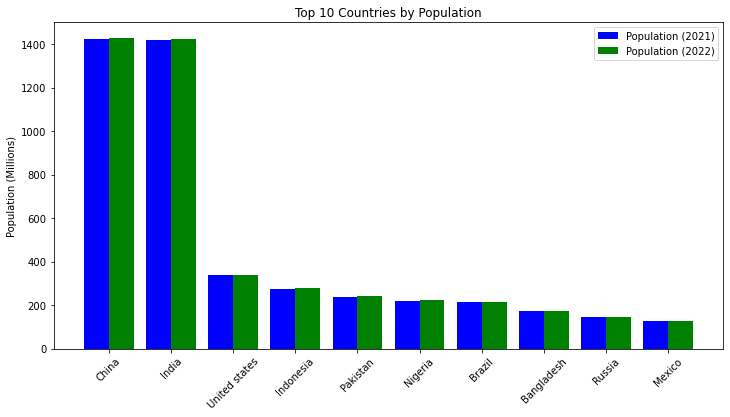

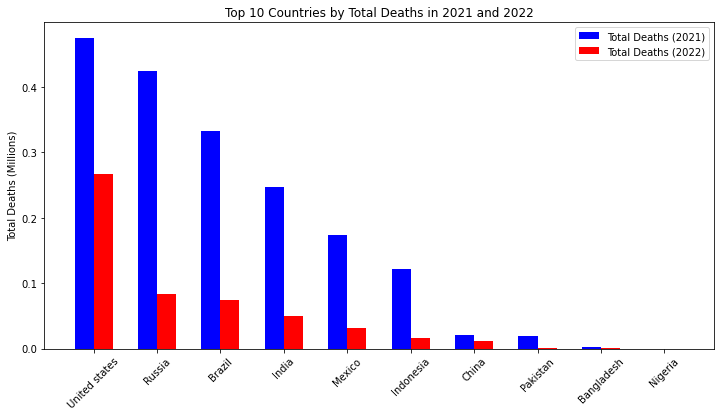

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('covid_impact.db')

# Retrieve data from the tables
covid_query = "SELECT * FROM covid_cases"
population_query = "SELECT * FROM population"

covid_cases = pd.read_sql_query(covid_query, conn)
population = pd.read_sql_query(population_query, conn)

# Rename the columns
population.rename(columns={"Population (2022)": "Population (2021)", "Population (2023)": "Population (2022)"}, inplace=True)

# Capitalize country names for consistency
covid_cases["Country/Region"] = covid_cases["Country/Region"].str.capitalize()
population["Country"] = population["Country"].str.capitalize()

# Join the tables on the 'Country/Region' column
merged_data = covid_cases.merge(population, left_on="Country/Region", right_on="Country", how="left")

# Filter the data for the years 2021 and 2022
filtered_data_2021 = merged_data[merged_data["Year"] == 2021]
filtered_data_2022 = merged_data[merged_data["Year"] == 2022]

# Group the data by Country/Region and calculate the total population and deaths for 2021 and 2022 separately
country_data_2021 = filtered_data_2021.groupby("Country/Region").agg({"Population (2021)": "max", "Deaths": "sum"}).reset_index()
country_data_2022 = filtered_data_2022.groupby("Country/Region").agg({"Population (2022)": "max", "Deaths": "sum"}).reset_index()

# Sort the data in descending order based on population for 2021
country_data_2021 = country_data_2021.sort_values(by="Population (2021)", ascending=False).head(10)

# Sort the data in descending order based on population for 2022
country_data_2022 = country_data_2022.sort_values(by="Population (2022)", ascending=False).head(10)

# Convert population and Deaths to millions for 2022
country_data_2022["Population (2022)"] = country_data_2022["Population (2022)"] / 1e6
country_data_2021["Population (2021)"] = country_data_2021["Population (2021)"] / 1e6
country_data_2022["Deaths"] = country_data_2022["Deaths"] / 1e6
country_data_2021["Deaths"] = country_data_2021["Deaths"] / 1e6

# Plot the bars for population in 2021 and 2022

# Set the figure size
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Create the x-axis positions for bars
x = range(len(country_data_2021))

plt.bar(x, country_data_2021["Population (2021)"], color="blue", label="Population (2021)", width=bar_width)
plt.bar([i + bar_width for i in x], country_data_2022["Population (2022)"], color="green", label="Population (2022)", width=bar_width)

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in x], country_data_2021["Country/Region"], rotation=45)

# Set the y-axis label
plt.ylabel("Population (Millions)")

# Set the chart title
plt.title("Top 10 Countries by Population")

# Add a legend
plt.legend()

# Show the chart
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Sort the data in descending order based on deaths for 2021
country_data_2021 = country_data_2021.sort_values(by="Deaths", ascending=False).head(10)

# Sort the data in descending order based on deaths for 2022
country_data_2022 = country_data_2022.sort_values(by="Deaths", ascending=False).head(10)

# Create the x-axis positions for bars
x1 = range(len(country_data_2021))
x2 = range(len(country_data_2022))

# Plot the bars for deaths in 2021 and 2022
bar_width = 0.3
plt.bar(x1, country_data_2021["Deaths"], color="blue", label="Total Deaths (2021)", width=bar_width)
plt.bar([i + bar_width for i in x2], country_data_2022["Deaths"], color="red", label="Total Deaths (2022)", width=bar_width)

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in x2], country_data_2022["Country/Region"], rotation=45)

# Set the y-axis label
plt.ylabel("Total Deaths (Millions)")

# Set the chart title
plt.title("Top 10 Countries by Total Deaths in 2021 and 2022")

# Add a legend
plt.legend()

# Show the chart
plt.show()

# Close the database connection
conn.close()


Based on the above data on impact of COVID-19 on deaths in 2021 and 2022. Here are some possible observations:

1. Country with the highest deaths in 2021: United States reported the highest number of deaths in 2021 with a total of 474,864 deaths. This indicates a significant impact of COVID-19 on the country's population.

2. Continuation of high deaths in 2022: The United States maintained a high number of deaths in 2022 as well, with 267,296 deaths. This suggests that the impact of COVID-19 continued to be significant in the country, albeit at a slightly lower level compared to 2021.

3. Impact of COVID-19 in Brazil: Brazil had the second-highest number of deaths in both 2021 (424,262) and 2022 (74,519). This highlights the ongoing impact of the pandemic in the country, raising concerns about the effectiveness of mitigation measures and healthcare infrastructure.

4. Contrast in death numbers for India: India witnessed a higher number of deaths in 2021 (332,492) compared to 2022 (49,219). This could indicate that the COVID-19 situation improved in India between these two years, potentially reflecting the effects of vaccination campaigns and other control measures.

5. Varying impact in different countries: The data showcases the varying impact of COVID-19 across countries. For example, Mexico experienced a significant number of deaths in both years, whereas Russia had high deaths in 2021 but a substantial decrease in 2022.

6. Population size and death rates: Comparing the population sizes of different countries can provide insights into the death rates. For instance, despite having a larger population than the United States and Brazil, India's death numbers were lower in both years. This could suggest differences in infection rates, healthcare capacities, or containment strategies.

7. Overall decline in deaths: In general, there seems to be a decrease in the number of deaths from 2021 to 2022 in most countries. This may indicate the influence of vaccination efforts, improved treatments, and better management of the pandemic.

It's important to note that these analyses are based on the provided data, and a comprehensive understanding of the COVID-19 impact requires further examination, including additional contextual information, longitudinal data, and consideration of various factors influencing the outcomes.

## Visualization 5

Using covid_cases data, Heatmap Visualization of cases and Deaths for the years 2020, 2021 and 2023

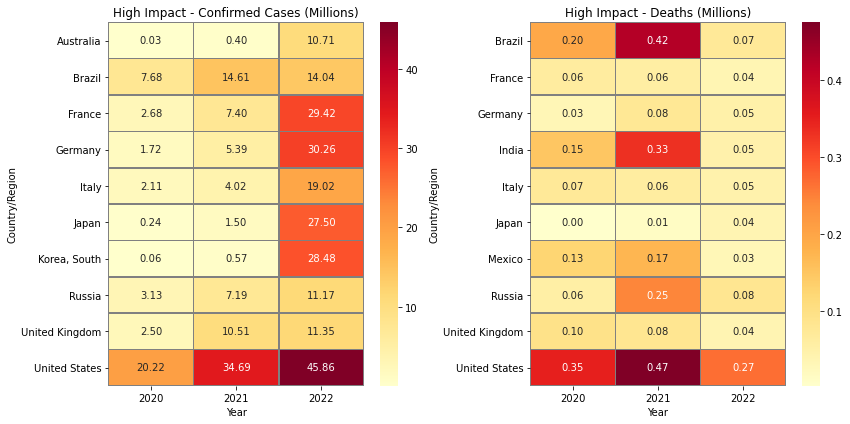

In [38]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('covid_impact.db')

# Fetch the data from the tables
covid_cases_data = pd.read_sql_query("SELECT * FROM covid_cases", conn)

# Define the number of countries to include in the heatmaps
num_countries = 10

# Get the countries with the highest confirmed cases and deaths in 2022
high_cases_countries = covid_cases_data[covid_cases_data['Year'] == 2022].nlargest(num_countries, 'Confirmed')['Country/Region']
high_deaths_countries = covid_cases_data[covid_cases_data['Year'] == 2022].nlargest(num_countries, 'Deaths')['Country/Region']

# Filter the data for the selected countries and years
high_cases_data = covid_cases_data[(covid_cases_data['Country/Region'].isin(high_cases_countries)) &
                                  (covid_cases_data['Year'].isin([2020, 2021, 2022]))]
high_deaths_data = covid_cases_data[(covid_cases_data['Country/Region'].isin(high_deaths_countries)) &
                                   (covid_cases_data['Year'].isin([2020, 2021, 2022]))]

# Pivot the data for the heatmaps
high_cases_heatmap_data = high_cases_data.pivot("Country/Region", "Year", "Confirmed")
high_deaths_heatmap_data = high_deaths_data.pivot("Country/Region", "Year", "Deaths")

# Convert the cases and deaths data to millions
high_cases_heatmap_data = high_cases_heatmap_data / 1000000
high_deaths_heatmap_data = high_deaths_heatmap_data / 1000000

#print the data
#print('high impact cases data')
#print(high_cases_heatmap_data)
#print('high impact deaths data')
#print(high_deaths_heatmap_data)

# Create the combined heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(high_cases_heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True, fmt='.2f')
plt.title('High Impact - Confirmed Cases (Millions)')
plt.xlabel('Year')
plt.ylabel('Country/Region')

plt.subplot(1, 2, 2)
sns.heatmap(high_deaths_heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True, fmt='.2f')
plt.title('High Impact - Deaths (Millions)')
plt.xlabel('Year')
plt.ylabel('Country/Region')

plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


Significant points and inferences:

1. High Impact Cases Data: The data represents the number of confirmed cases per million people for various countries in the years 2020, 2021, and 2022.

2. Trend in High Impact Cases: The data shows an increasing trend in the number of high impact cases for most countries over the three-year period. This indicates the severity of the COVID-19 outbreak and its impact on public health.

3. Varying Impact: The data reveals significant differences in the number of high impact cases among countries. For example, Australia has relatively low impact cases compared to countries like Brazil, France, Germany, Italy, Japan, Korea, South, Russia, the United Kingdom, and the United States.

4. Country Comparison: The data allows for a comparison of the high impact cases between countries. It shows that the United States consistently has the highest number of high impact cases among the listed countries, followed by France, Germany, Italy, Russia, and the United Kingdom.

5. Impact Fluctuation: Some countries experience fluctuations in high impact cases over the three-year period. For instance, Brazil initially had high impact cases in 2020, which decreased in 2021 but slightly increased again in 2022.

6. Implications: The data suggests that certain countries have been more successful in managing and reducing high impact cases compared to others. Factors such as healthcare infrastructure, testing capacity, public health measures, and vaccination efforts may contribute to these variations.

7. Data Limitations: It's important to consider that the data represents the number of confirmed cases per million people, which is just one aspect of the overall impact of COVID-19. Factors like population density, demographics, testing capabilities, and reporting practices can influence the accuracy and comparability of the data.

Overall, the provided data on high impact cases offers insights into the severity of the COVID-19 outbreak and the varying levels of impact among different countries. It highlights the need for continued efforts to control the spread of the virus and mitigate its effects on public health.

## Summary

The analysis of COVID-19 data, population sizes, and GDP changes among the top 20 countries provides valuable insights into the impact of the pandemic on different nations.

The United States, with the highest number of deaths in 2021 (474,864) and 2022 (267,296), experienced a significant impact of COVID-19 on its population. The country's large population and high death toll highlight the severity of the pandemic's impact. Despite a slight decrease in deaths in 2022, the United States continued to face significant challenges in managing the virus.

Brazil, with the second-highest number of deaths in both years (424,262 in 2021 and 74,519 in 2022), also suffered a substantial impact. The ongoing high death toll raises concerns about the effectiveness of mitigation measures and the resilience of the healthcare infrastructure in Brazil.

India witnessed a contrasting trend, with higher death numbers in 2021 (332,492) compared to 2022 (49,219). This indicates a potential improvement in the COVID-19 situation in the country, possibly reflecting the effects of vaccination campaigns and other control measures. Despite India's larger population compared to the United States and Brazil, the death numbers were relatively lower, suggesting varying infection rates, healthcare capacities, or containment strategies.

The impact of COVID-19 varied across different countries. Mexico, for example, experienced a significant number of deaths in both 2021 and 2022, indicating ongoing challenges in managing the pandemic. In contrast, Russia saw a high number of deaths in 2021 but a substantial decrease in 2022, suggesting improvements in the situation.

Comparing population sizes can provide insights into death rates. India's lower death numbers despite its larger population highlight potential differences in infection rates, healthcare capacities, or containment strategies compared to the United States and Brazil.

Overall, there was a decline in the number of deaths from 2021 to 2022 in most countries. This decline may be attributed to various factors such as vaccination efforts, improved treatments, and better management of the pandemic. The decreasing trend in deaths indicates progress in mitigating the impact of COVID-19.

Ethical considerations are crucial in analyzing and interpreting the data, ensuring privacy protection, data accuracy, transparency, and responsible data visualization. Additionally, recognizing the disproportionate impact on vulnerable populations, addressing potential biases in data collection and reporting, and considering broader contextual factors are essential for a comprehensive understanding of the COVID-19 impact.

In conclusion, the analysis of COVID-19 data, population sizes, and GDP changes highlights the varying impact of the pandemic on different countries. It underscores the need for tailored strategies that consider the unique context of each nation to effectively manage the virus, support healthcare systems, and foster economic recovery. Ethical considerations should guide the responsible use of data and findings to ensure informed decision-making, equitable outcomes, and a comprehensive understanding of the pandemic's impact.